In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random

In [2]:
# Reading the CSV file into a DataFrame
real_estate = pd.read_csv("Dataset-Real-estate.csv")

# Displaying the first few rows of the DataFrame
real_estate.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,USD,1.0,2.0,810 sqft,...,10,NaN,False,https://photos.zillowstatic.com/fp/11176e2f997...,FOR SALE,House for sale,"Marianne Malek, Broker","https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3219-Polk-A...,https://www.zillow.com/san-diego-ca/10_p/
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,USD,3.0,4.0,1996 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/f967921c9db...,FOR SALE,House for sale,NaN,"https://www.zillow.com/homes/San-Jose,-CA_rb/",https://www.zillow.com/homedetails/1801-Willow...,"https://www.zillow.com/homes/San-Jose,-CA_rb/"
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,USD,3.0,2.0,1750 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/c3faafa19ba...,FOR SALE,Condo for sale,First Team Real Estate,"https://www.zillow.com/homes/Carlsbad,-CA_rb/",https://www.zillow.com/homedetails/841-Kalpati...,https://www.zillow.com/carlsbad-ca/3_p/
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,USD,2.0,2.0,1400 sqft,...,2,NaN,False,https://photos.zillowstatic.com/fp/892cd9b3188...,FOR SALE,Townhouse for sale,Coldwell Banker West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3262-Loma-R...,https://www.zillow.com/san-diego-ca/3_p/
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,USD,1.0,1.0,716 sqft,...,61,NaN,False,https://photos.zillowstatic.com/fp/6a4f846cf2c...,FOR SALE,Condo for sale,Realty One Group West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/18614-Camin...,https://www.zillow.com/san-diego-ca/19_p/


In [3]:
# Display the size of the dataset
print("Dataset Size:", real_estate.shape)

Dataset Size: (1755, 23)


In [4]:
# Display column names, data types, and other info
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             1755 non-null   int64  
 1   property_id      1755 non-null   int64  
 2   address          1755 non-null   object 
 3   latitude         1752 non-null   float64
 4   longitude        1752 non-null   float64
 5   price            1755 non-null   int64  
 6   currency         1755 non-null   object 
 7   bathrooms        1696 non-null   float64
 8   bedrooms         1698 non-null   float64
 9   area             1700 non-null   object 
 10  land_area        49 non-null     object 
 11  zestimate        1421 non-null   float64
 12  rent_zestimate   1644 non-null   float64
 13  days_on_zillow   1755 non-null   int64  
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  1755 non-null   bool   
 16  image            1755 non-null   object 
 17  listing_type  

In [5]:
# Display summary statistics for numerical columns
real_estate.describe()

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,sold_date
count,1755.000000,1.755000e+03,1752.000000,1752.000000,1.755000e+03,1696.000000,1698.000000,1.421000e+03,1644.000000,1755.000000,0.0
mean,272.190313,3.102666e+08,34.266083,-118.682747,1.855266e+06,2.806014,3.199058,1.785572e+06,5671.513382,36.729915,NaN
std,228.183764,6.593846e+08,1.920366,2.068896,2.711278e+06,1.531417,1.434222,2.468960e+06,7444.323099,58.465185,NaN
min,1.000000,1.538474e+07,32.545590,-122.023070,0.000000e+00,1.000000,0.000000,9.990000e+04,307.000000,0.000000,NaN
25%,76.000000,1.697147e+07,32.789508,-121.785543,7.355000e+05,2.000000,2.000000,7.484000e+05,3098.250000,4.000000,NaN
50%,205.000000,2.549190e+07,33.109251,-117.290883,1.199000e+06,2.000000,3.000000,1.188700e+06,3995.000000,16.000000,NaN
75%,424.500000,1.251247e+08,37.241107,-117.158595,1.900000e+06,3.000000,4.000000,1.874800e+06,5507.750000,44.000000,NaN
max,820.000000,2.146926e+09,37.426476,-116.990800,3.999500e+07,13.000000,14.000000,3.575280e+07,126809.000000,641.000000,NaN


## Handling the Null Values

In [6]:
# Checking for missing values
real_estate.isnull().sum()

rank                  0
property_id           0
address               0
latitude              3
longitude             3
price                 0
currency              0
bathrooms            59
bedrooms             57
area                 55
land_area          1706
zestimate           334
rent_zestimate      111
days_on_zillow        0
sold_date          1755
is_zillow_owned       0
image                 0
listing_type          0
status_text           0
broker_name         505
input                 0
property_url          0
listing_url           0
dtype: int64

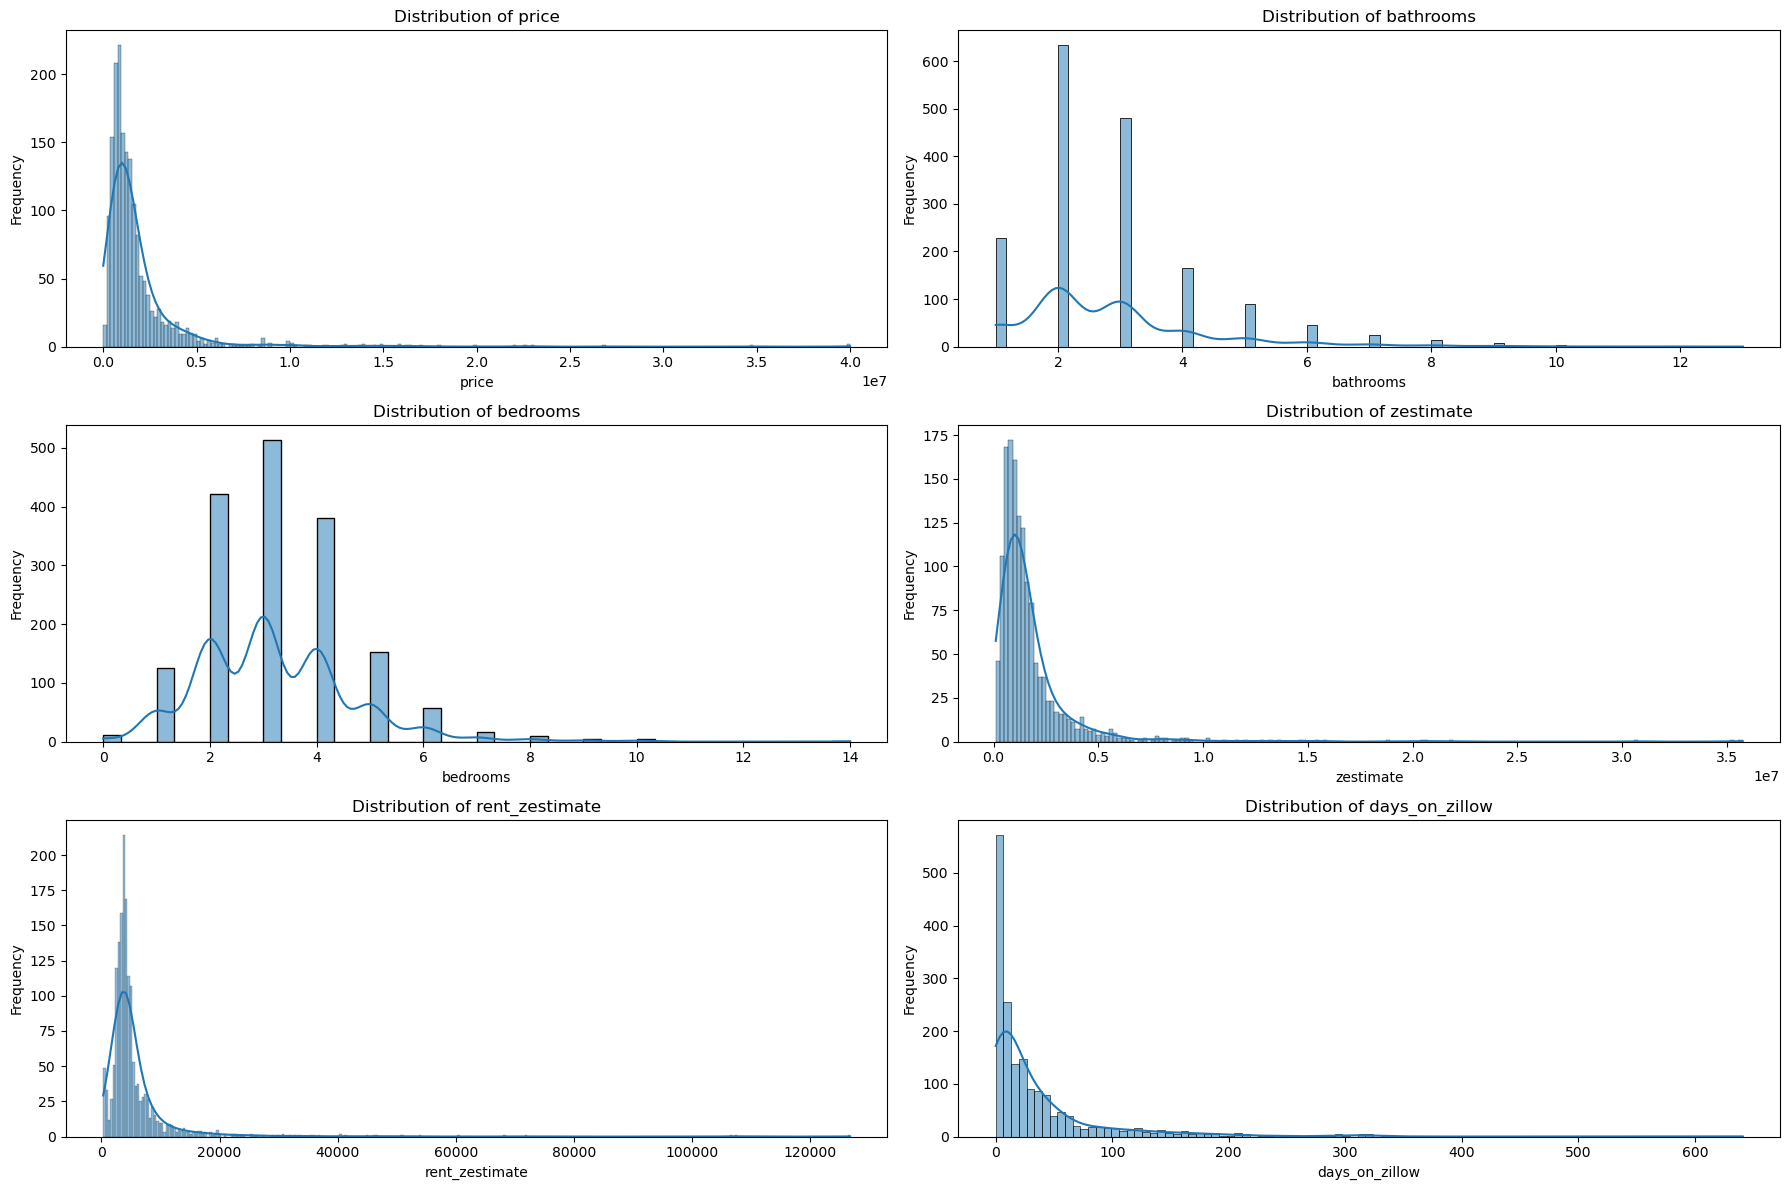

In [7]:
# Visualizing Data to Check for Outliers and Distribution Before Imputation
# Numeric columns to visualize
numeric_columns = ['price', 'bathrooms', 'bedrooms', 'zestimate', 'rent_zestimate', 'days_on_zillow']

# Create a figure to display histograms and box plots
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_columns, start=1):
    # Histogram with Kernel Density Estimate (KDE)
    plt.subplot(3, 2, i)
    sns.histplot(real_estate[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

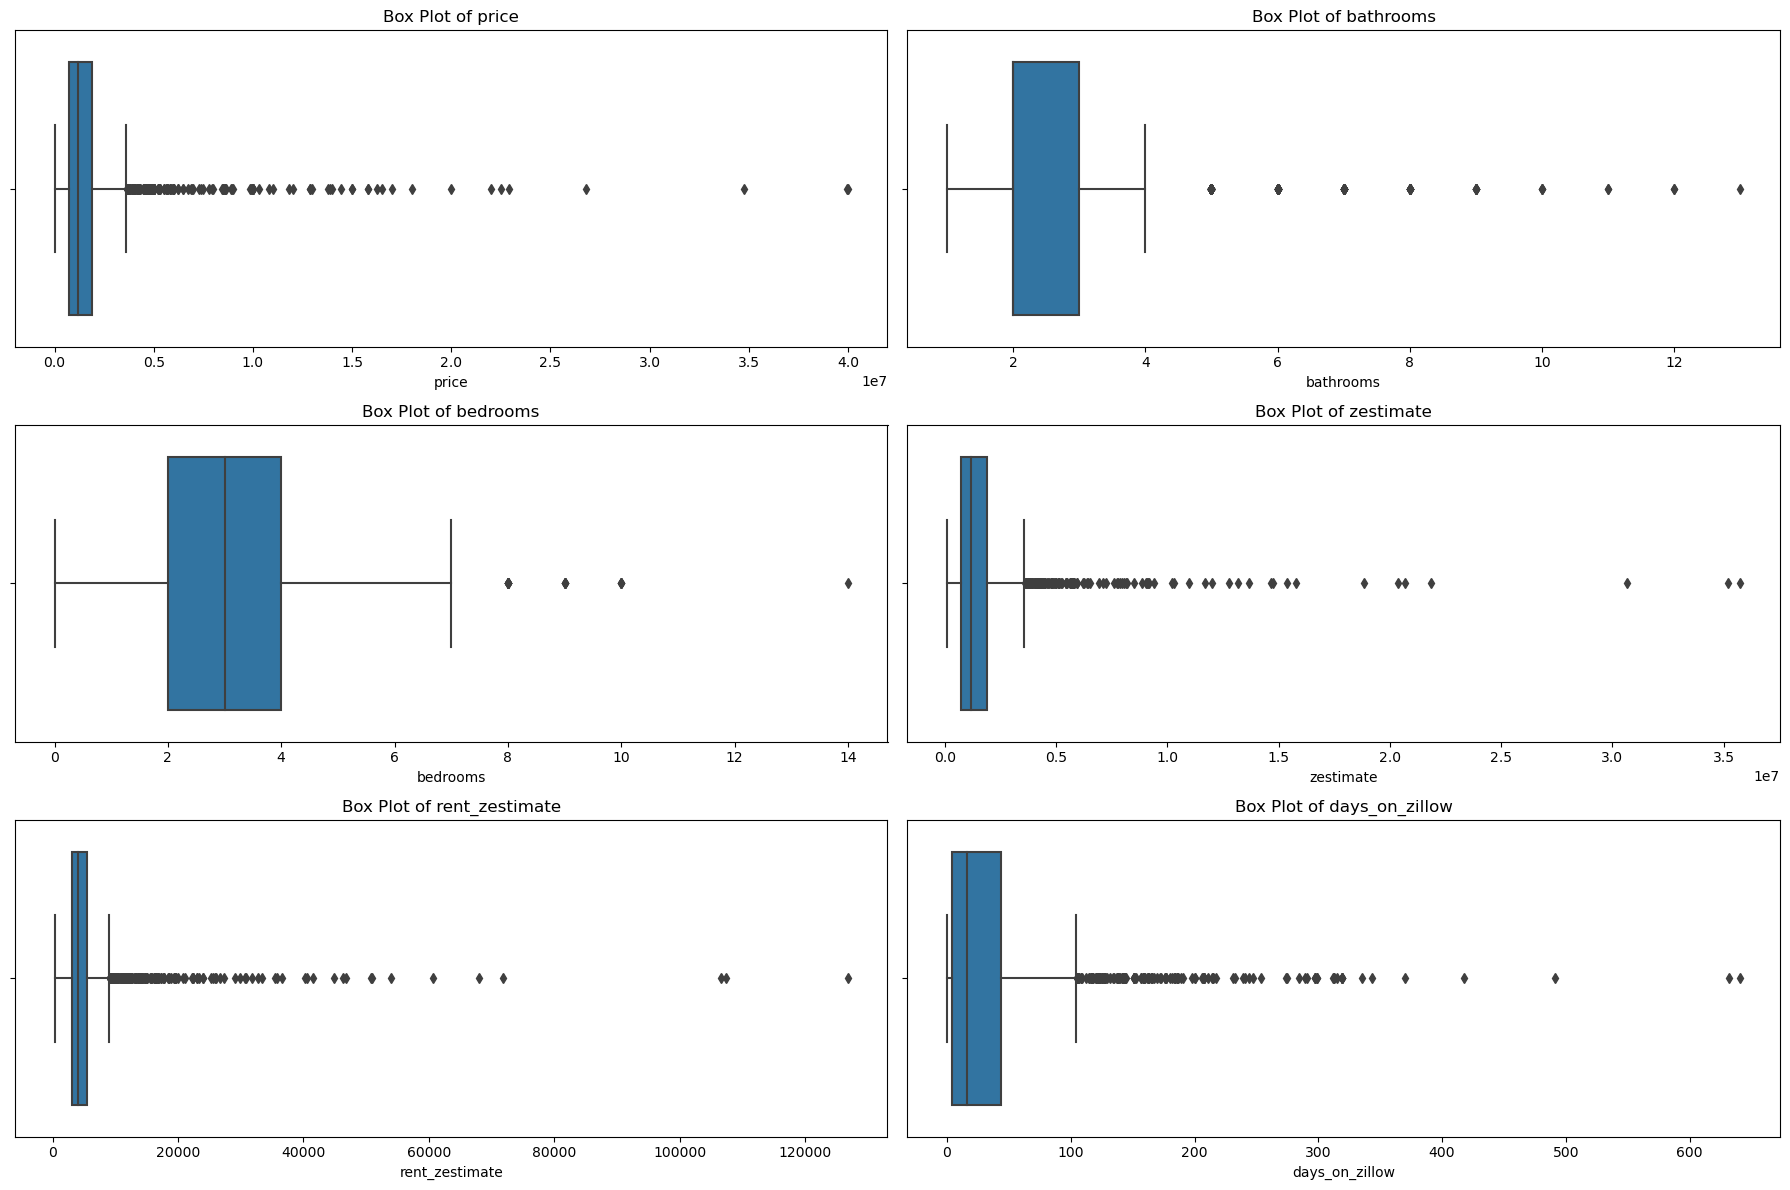

In [8]:
# Create box plots to visualize outliers
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=real_estate[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

In [9]:
# 1. Dropping rows with missing lat/long)
real_estate.dropna(subset=['latitude', 'longitude'], inplace=True)

In [10]:
# Function to convert area and land_area to numeric
def clean_area(value):
    if pd.isnull(value):
        return None
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas
        if 'acres' in value:
            # Convert acres to sqft (1 acre = 43,560 sqft)
            return float(value.replace(' acres', '').strip()) * 43560
        elif 'sqft' in value:
            # Remove ' sqft' and convert to float
            return float(value.replace(' sqft', '').strip())
    # Return None if the value is not recognized or is not a string
    return None

# Clean 'area' and 'land_area' columns
real_estate['area'] = real_estate['area'].apply(clean_area)
real_estate['land_area'] = real_estate['land_area'].apply(clean_area)

In [11]:
# 2. Impute missing values with median (because the distribution is skewed and has outliers)
real_estate['bathrooms'].fillna(real_estate['bathrooms'].median(), inplace=True)
real_estate['bedrooms'].fillna(real_estate['bedrooms'].median(), inplace=True)
real_estate['area'].fillna(real_estate['area'].median(), inplace=True)
real_estate['land_area'].fillna(real_estate['land_area'].median(), inplace=True)
real_estate['zestimate'].fillna(real_estate['zestimate'].median(), inplace=True)
real_estate['rent_zestimate'].fillna(real_estate['rent_zestimate'].median(), inplace=True)

In [12]:
# 3. Impute `broker_name` with 'Unknown'
real_estate['broker_name'].fillna('Unknown', inplace=True)

In [13]:
# 4. Keeping the sold_date as 'unknown' (because imputing with incorrect dates is not ideal in real-world scenario)
real_estate['sold_date_missing'] = real_estate['sold_date'].isnull().astype(int)
real_estate['sold_date'].fillna('unknown', inplace=True) 

In [14]:
# Checking if all missing values have been handled
print("\nMissing values after imputation:")
print(real_estate.isnull().sum())


Missing values after imputation:
rank                 0
property_id          0
address              0
latitude             0
longitude            0
price                0
currency             0
bathrooms            0
bedrooms             0
area                 0
land_area            0
zestimate            0
rent_zestimate       0
days_on_zillow       0
sold_date            0
is_zillow_owned      0
image                0
listing_type         0
status_text          0
broker_name          0
input                0
property_url         0
listing_url          0
sold_date_missing    0
dtype: int64


In [15]:
# Displaying the first few rows of the updated DataFrame
real_estate.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,sold_date,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url,sold_date_missing
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,USD,1.0,2.0,810.0,...,unknown,False,https://photos.zillowstatic.com/fp/11176e2f997...,FOR SALE,House for sale,"Marianne Malek, Broker","https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3219-Polk-A...,https://www.zillow.com/san-diego-ca/10_p/,1
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,USD,3.0,4.0,1996.0,...,unknown,False,https://photos.zillowstatic.com/fp/f967921c9db...,FOR SALE,House for sale,Unknown,"https://www.zillow.com/homes/San-Jose,-CA_rb/",https://www.zillow.com/homedetails/1801-Willow...,"https://www.zillow.com/homes/San-Jose,-CA_rb/",1
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,USD,3.0,2.0,1750.0,...,unknown,False,https://photos.zillowstatic.com/fp/c3faafa19ba...,FOR SALE,Condo for sale,First Team Real Estate,"https://www.zillow.com/homes/Carlsbad,-CA_rb/",https://www.zillow.com/homedetails/841-Kalpati...,https://www.zillow.com/carlsbad-ca/3_p/,1
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,USD,2.0,2.0,1400.0,...,unknown,False,https://photos.zillowstatic.com/fp/892cd9b3188...,FOR SALE,Townhouse for sale,Coldwell Banker West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3262-Loma-R...,https://www.zillow.com/san-diego-ca/3_p/,1
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,USD,1.0,1.0,716.0,...,unknown,False,https://photos.zillowstatic.com/fp/6a4f846cf2c...,FOR SALE,Condo for sale,Realty One Group West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/18614-Camin...,https://www.zillow.com/san-diego-ca/19_p/,1


## Handling the duplicates

In [16]:
# Checking for duplicates in the DataFrame
duplicates = real_estate.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Handling Categorical features

In [17]:
# Displaying unique values in the categorical column
print("Unique values in 'currency':", real_estate['currency'].unique())
print("Unique values in 'listing_type':", real_estate['listing_type'].unique())
print("Unique values in 'status_text':", real_estate['status_text'].unique())
print("Unique values in 'is_zillow_owned':", real_estate['is_zillow_owned'].unique())

Unique values in 'currency': ['USD']
Unique values in 'listing_type': ['FOR SALE']
Unique values in 'status_text': ['House for sale' 'Condo for sale' 'Townhouse for sale' 'Home for sale'
 'New construction' 'Coming soon' 'Lot / Land for sale'
 'Multi-family home for sale' 'Foreclosure' 'Auction']
Unique values in 'is_zillow_owned': [False]


In [18]:
# Dropping irrelevant columns
columns_to_drop = ['sold_date', 'image', 'property_url', 'listing_url', 'input']
real_estate.drop(columns=columns_to_drop, inplace=True)

In [19]:
# One-hot encoding for 'status_text' to handle multiple categories
real_estate = pd.get_dummies(real_estate, columns=['status_text'], drop_first=True)

In [20]:
# Displaying the first few rows of the updated DataFrame
real_estate.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,sold_date_missing,status_text_Coming soon,status_text_Condo for sale,status_text_Foreclosure,status_text_Home for sale,status_text_House for sale,status_text_Lot / Land for sale,status_text_Multi-family home for sale,status_text_New construction,status_text_Townhouse for sale
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,USD,1.0,2.0,810.0,...,1,0,0,0,0,1,0,0,0,0
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,USD,3.0,4.0,1996.0,...,1,0,0,0,0,1,0,0,0,0
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,USD,3.0,2.0,1750.0,...,1,0,1,0,0,0,0,0,0,0
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,USD,2.0,2.0,1400.0,...,1,0,0,0,0,0,0,0,0,1
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,USD,1.0,1.0,716.0,...,1,0,1,0,0,0,0,0,0,0


In [21]:
# Display column names, data types, and other info
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 0 to 1754
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   rank                                    1752 non-null   int64  
 1   property_id                             1752 non-null   int64  
 2   address                                 1752 non-null   object 
 3   latitude                                1752 non-null   float64
 4   longitude                               1752 non-null   float64
 5   price                                   1752 non-null   int64  
 6   currency                                1752 non-null   object 
 7   bathrooms                               1752 non-null   float64
 8   bedrooms                                1752 non-null   float64
 9   area                                    1752 non-null   float64
 10  land_area                               1752 non-null   floa

## Feature Scaling

In [22]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns to scale
numerical_columns = ['price', 'bathrooms', 'bedrooms', 'area', 'land_area', 'zestimate', 
                     'rent_zestimate', 'days_on_zillow'] 

# Apply scaling to the selected columns
real_estate[numerical_columns] = scaler.fit_transform(real_estate[numerical_columns])

# Display the first few rows to check the scaling
real_estate[numerical_columns].head()

,price,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow
0,-0.389472,-1.179086,-0.844855,-0.072019,-0.047335,-0.487733,-0.306955,-0.456083
1,0.185115,0.147670,0.573627,-0.026436,-0.047335,0.365435,-0.079652,-0.575825
2,-0.315046,0.147670,-0.844855,-0.035891,-0.047335,-0.286432,-0.234789,-0.575825
3,-0.390954,-0.515708,-0.844855,-0.049343,-0.047335,-0.378425,-0.217613,-0.592931
4,-0.518763,-1.179086,-1.554096,-0.075632,-0.047335,-0.216319,-0.439929,0.416325


___

## EDA's

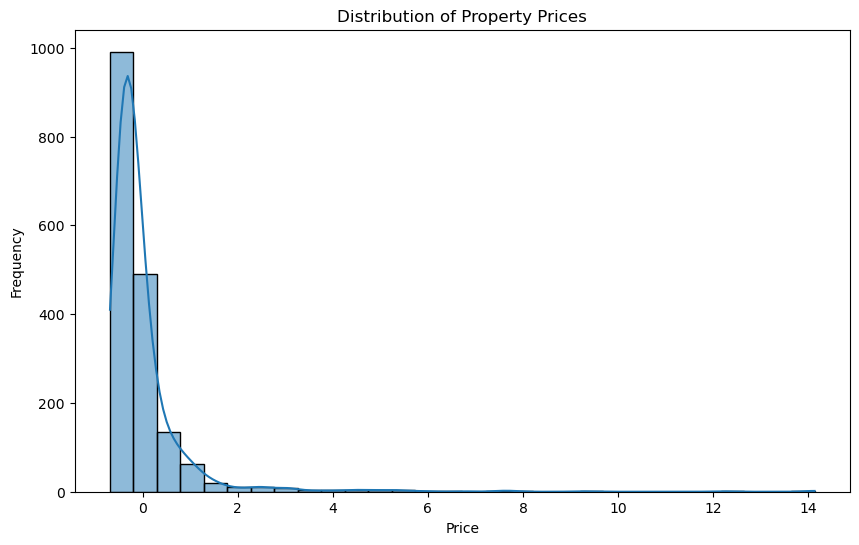

In [23]:
# 1. Visualize the distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(real_estate['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

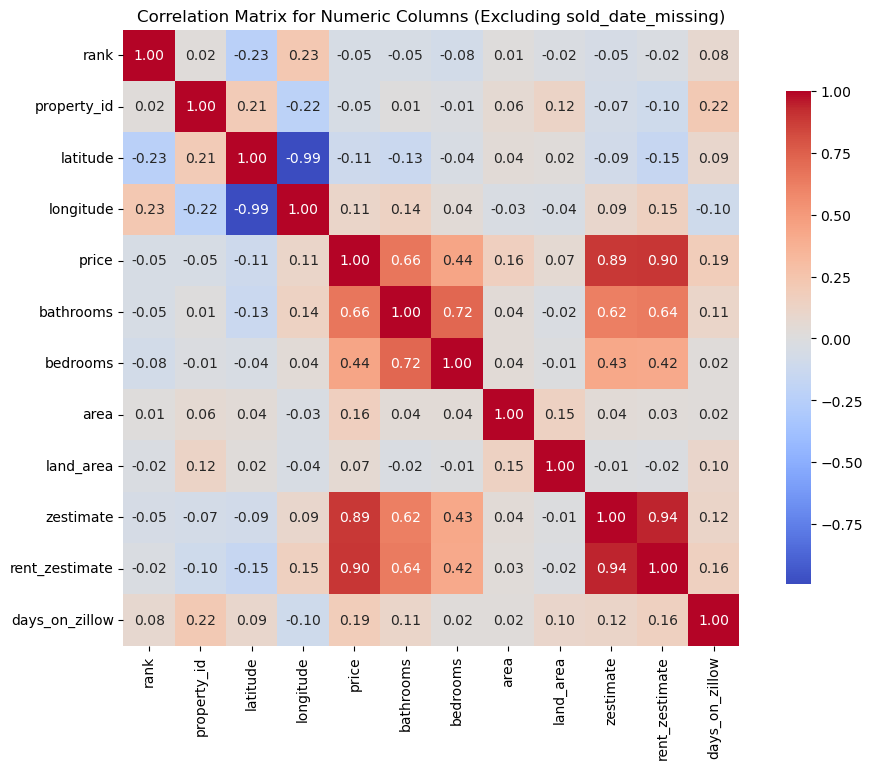

In [24]:
# 2. Analyze the correlation matrix
numeric_columns = real_estate.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('sold_date_missing')  # Remove 'sold_date_missing' from the list
correlation_matrix = real_estate[numeric_columns].corr()

# 3. Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Numeric Columns (Excluding sold_date_missing)')
plt.show()

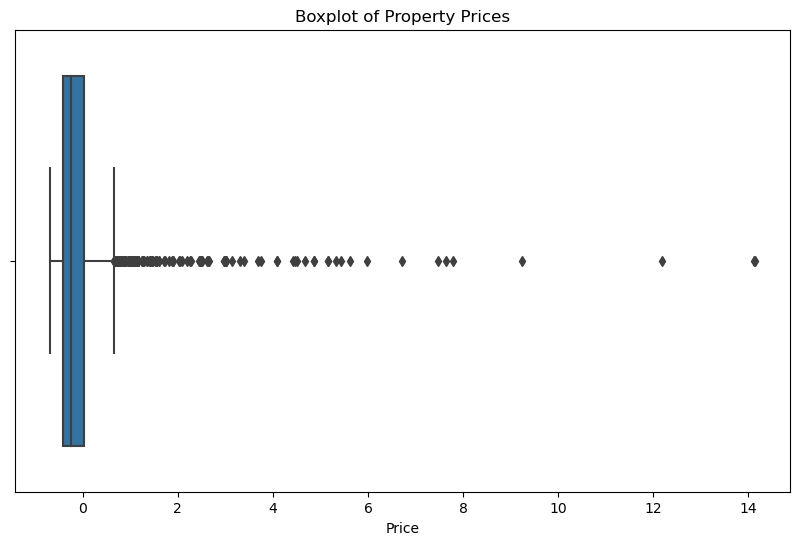

In [25]:
# 4. Identify outliers using boxplots (there are many outliers, which needs to be transformed/removed)
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=real_estate)
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()

/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


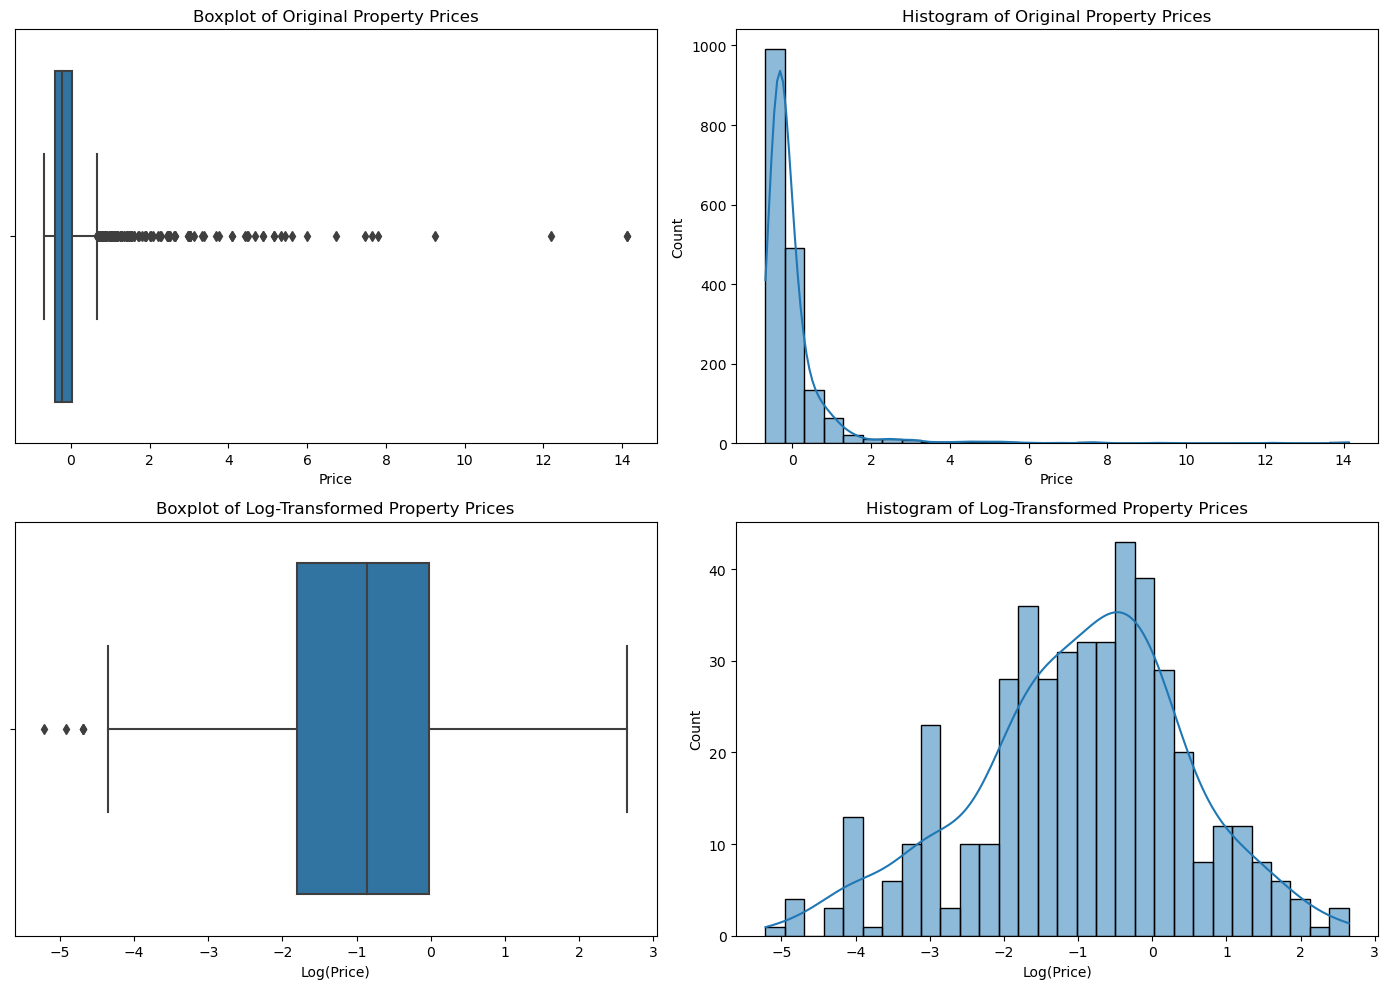

Statistical Summary of Original Prices:
 count    1.752000e+03
mean    -2.991012e-17
std      1.000286e+00
min     -6.854712e-01
25%     -4.129038e-01
50%     -2.412965e-01
75%      1.840661e-02
max      1.413116e+01
Name: price, dtype: float64

Statistical Summary of Log-Transformed Prices:
 count    456.000000
mean      -0.977211
std        1.433784
min       -5.213896
25%       -1.800027
50%       -0.855745
75%       -0.020074
max        2.648382
Name: log_price, dtype: float64


In [26]:
## Transforming the outliers rather than removing as we there are many records
# Create a copy of the original price column
real_estate['log_price'] = np.log(real_estate['price'])

# Plotting the original and transformed price distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot for original price
sns.boxplot(x='price', data=real_estate, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Original Property Prices')
axes[0, 0].set_xlabel('Price')

# Histogram for original price
sns.histplot(real_estate['price'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Original Property Prices')
axes[0, 1].set_xlabel('Price')

# Boxplot for log-transformed price
sns.boxplot(x='log_price', data=real_estate, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Log-Transformed Property Prices')
axes[1, 0].set_xlabel('Log(Price)')

# Histogram for log-transformed price
sns.histplot(real_estate['log_price'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Log-Transformed Property Prices')
axes[1, 1].set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

# Statistical summary before and after transformation
original_stats = real_estate['price'].describe()
log_transformed_stats = real_estate['log_price'].describe()

print("Statistical Summary of Original Prices:\n", original_stats)
print("\nStatistical Summary of Log-Transformed Prices:\n", log_transformed_stats)

## Create Future Price Targets columns

In [27]:
# Step 1: Calculate future prices
annual_increase_rate = 0.05  # Assumption: 5% annual increase

real_estate['price_1yr'] = real_estate['price'] * (1 + annual_increase_rate)
real_estate['price_2yr'] = real_estate['price'] * (1 + annual_increase_rate) ** 2
real_estate['price_5yr'] = real_estate['price'] * (1 + annual_increase_rate) ** 5

# Drop rows with NaN values resulting from the shift
real_estate.dropna(subset=['price_1yr', 'price_2yr', 'price_5yr'], inplace=True)

In [28]:
# Dropping irrelevant columns from the DataFrame
columns_to_drop = [
    'rank',
    'property_id',
    'address',
    'currency',
    'sold_date_missing',
    'listing_type',
    'broker_name'
]

# Dropping the specified columns
real_estate_cleaned = real_estate.drop(columns=columns_to_drop)

# Display the cleaned DataFrame's columns to verify
print(real_estate_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 0 to 1754
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   latitude                                1752 non-null   float64
 1   longitude                               1752 non-null   float64
 2   price                                   1752 non-null   float64
 3   bathrooms                               1752 non-null   float64
 4   bedrooms                                1752 non-null   float64
 5   area                                    1752 non-null   float64
 6   land_area                               1752 non-null   float64
 7   zestimate                               1752 non-null   float64
 8   rent_zestimate                          1752 non-null   float64
 9   days_on_zillow                          1752 non-null   float64
 10  is_zillow_owned                         1752 non-null   bool

# Price Prediction for Year 5

In [29]:
# Step 2: Drop rows with NaN values resulting from the calculations
real_estate_cleaned.dropna(subset=['price_1yr', 'price_2yr', 'price_5yr'], inplace=True)

# Step 3: Define input features and target variable
# Using 'price_5yr' as the target variable, you can do similarly for others
X = real_estate_cleaned.drop(columns=['price', 'price_1yr', 'price_2yr', 'price_5yr', 'log_price'])
y = real_estate_cleaned['price_5yr']  # Change this if you want to predict other prices

# Step 4: Split the data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Random Forest

In [30]:
# Step 5: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
R-squared: 0.91
Mean Absolute Error (MAE): 0.12


In [31]:
# Step 8: Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', 0.1, 0.2],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best parameters and model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Step 10: Make predictions with the best model
y_pred_tuned = best_rf_model.predict(X_test)

# Step 11: Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r_squared_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

# Print evaluation metrics for the tuned model
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R-squared: {r_squared_tuned:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned:.2f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramete

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Squared Error (MSE): 0.35
Root Mean Squared Error (RMSE): 0.59
R-squared: 0.82
Mean Absolute Error (MAE): 0.15


## Model 2: Decision Tree

In [32]:
# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_dt = dt_model.predict(X_test)

# Step 7: Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r_squared_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared: {r_squared_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.57
R-squared: 0.83
Mean Absolute Error (MAE): 0.16


In [33]:
# Step 5: Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10]
}

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 6: Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Step 7: Fit GridSearchCV to training data
grid_search_dt.fit(X_train, y_train)

# Step 8: Get the best parameters and the best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Step 9: Make predictions using the best model
y_pred_tuned_dt = best_dt_model.predict(X_test)

# Step 10: Evaluate the tuned Decision Tree model
mse_tuned_dt = mean_squared_error(y_test, y_pred_tuned_dt)
rmse_tuned_dt = np.sqrt(mse_tuned_dt)
r_squared_tuned_dt = r2_score(y_test, y_pred_tuned_dt)
mae_tuned_dt = mean_absolute_error(y_test, y_pred_tuned_dt)

# Print evaluation metrics for the tuned Decision Tree model
print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Mean Squared Error (MSE): {mse_tuned_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_dt:.2f}")
print(f"R-squared: {r_squared_tuned_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_dt:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Decision Tree: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error (MSE): 0.41
Root Mean Squared Error (RMSE): 0.64
R-squared: 0.79
Mean Absolute Error (MAE): 0.17


## Model 3: Gradient Boost

In [34]:
# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_gb = gb_model.predict(X_test)

# Step 7: Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r_squared_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Print evaluation metrics
print(f"Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared: {r_squared_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")

Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.45
R-squared: 0.89
Mean Absolute Error (MAE): 0.16


In [35]:
# Step 5: Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [100, 200, 300],                # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.05],             # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],                         # Maximum depth of each tree
    'min_samples_split': [2, 10, 20],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]          # Number of features to consider for the best split
}

# Step 6: Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Step 7: Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist_gb,
                                       n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error',
                                       random_state=42)

# Step 8: Fit RandomizedSearchCV to training data
random_search_gb.fit(X_train, y_train)

# Step 9: Get the best parameters and the best model
best_params_gb = random_search_gb.best_params_
best_gb_model = random_search_gb.best_estimator_

# Step 10: Make predictions using the best model
y_pred_tuned_gb = best_gb_model.predict(X_test)

# Step 11: Evaluate the tuned Gradient Boosting model
mse_tuned_gb = mean_squared_error(y_test, y_pred_tuned_gb)
rmse_tuned_gb = np.sqrt(mse_tuned_gb)
r_squared_tuned_gb = r2_score(y_test, y_pred_tuned_gb)
mae_tuned_gb = mean_absolute_error(y_test, y_pred_tuned_gb)

# Print evaluation metrics for the tuned Gradient Boosting model
print(f"Best Parameters for Gradient Boosting: {best_params_gb}")
print(f"Mean Squared Error (MSE): {mse_tuned_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gb:.2f}")
print(f"R-squared: {r_squared_tuned_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_gb:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Gradient Boosting: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared: 0.92
Mean Absolute Error (MAE): 0.12


## Model 4: Linear Regression

In [36]:
# Step 1: Initialize the Linear Regression model
linear_model = LinearRegression()

# Step 2: Train the model
linear_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_linear = linear_model.predict(X_test)

# Step 4: Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r_squared_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Print evaluation metrics
print(f"Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared: {r_squared_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared: 0.91
Mean Absolute Error (MAE): 0.20


## Ridge Regression

In [37]:
# Step 5: Define the parameter grid for Ridge regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False]  # Fit intercept or not
}

# Step 6: Initialize the Ridge regression model
ridge_model = Ridge()

# Step 7: Initialize GridSearchCV for Ridge regression
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge,
                                   cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                                   verbose=2)

# Step 8: Fit GridSearchCV to training data
grid_search_ridge.fit(X_train, y_train)

# Step 9: Get the best parameters and the best model
best_params_ridge = grid_search_ridge.best_params_
best_ridge_model = grid_search_ridge.best_estimator_

# Step 10: Make predictions using the best Ridge model
y_pred_tuned_ridge = best_ridge_model.predict(X_test)

# Step 11: Evaluate the tuned Ridge model
mse_tuned_ridge = mean_squared_error(y_test, y_pred_tuned_ridge)
rmse_tuned_ridge = np.sqrt(mse_tuned_ridge)
r_squared_tuned_ridge = r2_score(y_test, y_pred_tuned_ridge)
mae_tuned_ridge = mean_absolute_error(y_test, y_pred_tuned_ridge)

# Print evaluation metrics for the tuned Ridge model
print(f"Best Parameters for Ridge Regression: {best_params_ridge}")
print(f"Mean Squared Error (MSE): {mse_tuned_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_ridge:.2f}")
print(f"R-squared: {r_squared_tuned_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_ridge:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Ridge Regression: {'alpha': 100, 'fit_intercept': False}
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared: 0.91
Mean Absolute Error (MAE): 0.20


## Lasso Regression

In [38]:
# Step 6: Define the parameter grid for Lasso regression
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False]  # Fit intercept or not
}

# Step 7: Initialize the Lasso regression model
lasso_model = Lasso()

# Step 8: Initialize GridSearchCV for Lasso regression
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso,
                                   cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                                   verbose=2)

# Step 9: Fit GridSearchCV to training data
grid_search_lasso.fit(X_train, y_train)

# Step 10: Get the best parameters and the best model
best_params_lasso = grid_search_lasso.best_params_
best_lasso_model = grid_search_lasso.best_estimator_

# Step 11: Make predictions using the best Lasso model
y_pred_tuned_lasso = best_lasso_model.predict(X_test)

# Step 12: Evaluate the tuned Lasso model
mse_tuned_lasso = mean_squared_error(y_test, y_pred_tuned_lasso)
rmse_tuned_lasso = np.sqrt(mse_tuned_lasso)
r_squared_tuned_lasso = r2_score(y_test, y_pred_tuned_lasso)
mae_tuned_lasso = mean_absolute_error(y_test, y_pred_tuned_lasso)

# Print evaluation metrics for the tuned Lasso model
print(f"Best Parameters for Lasso Regression: {best_params_lasso}")
print(f"Mean Squared Error (MSE): {mse_tuned_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_lasso:.2f}")
print(f"R-squared: {r_squared_tuned_lasso:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_lasso:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Lasso Regression: {'alpha': 0.1, 'fit_intercept': False}
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.44
R-squared: 0.90
Mean Absolute Error (MAE): 0.20


## Model 5: XGBoost

In [39]:
# Step 1: Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 4: Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Step 5: Print evaluation metrics
print(f"XGBoost Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared: {r_squared_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")

XGBoost Regressor Metrics:
Mean Squared Error (MSE): 0.31
Root Mean Squared Error (RMSE): 0.55
R-squared: 0.84
Mean Absolute Error (MAE): 0.14


In [40]:
# Step 5: Define the parameter distribution for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],              # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.05],           # Step size shrinkage
    'max_depth': [3, 5, 7],                       # Maximum depth of a tree
    'min_child_weight': [1, 2, 4],                # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],                 # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]           # Subsample ratio of columns when constructing each tree
}

# Step 6: Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 7: Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                        n_iter=50, cv=5, n_jobs=-1, verbose=2,
                                        scoring='neg_mean_squared_error', random_state=42)

# Step 8: Fit RandomizedSearchCV to training data
random_search_xgb.fit(X_train, y_train)

# Step 9: Get the best parameters and the best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

# Step 10: Make predictions using the best model
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

# Step 11: Evaluate the tuned XGBoost model
mse_tuned_xgb = mean_squared_error(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mse_tuned_xgb)
r_squared_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)
mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)

# Print evaluation metrics for the tuned XGBoost model
print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Mean Squared Error (MSE): {mse_tuned_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_xgb:.2f}")
print(f"R-squared: {r_squared_tuned_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_xgb:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=8, min_samples_split=5, n_estimators=100;

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, max_features=0.1, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=20, max_features=log2, m

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=400; total time=   2.1s
[CV] END max_depth=None, max_features=0.2, 

[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  11.1s
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Mean Squared Error (MSE): 0.31
Root Mean Squared Error (RMSE): 0.56
R-squared: 0.84
Mean Absolute Error (MAE): 0.14


## Model 6: SVR Regressor

In [41]:
# Step 1: Initialize the Support Vector Regressor model
svr_model = SVR(kernel='rbf')  

# Step 2: Train the model
svr_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_svr = svr_model.predict(X_test)

# Step 4: Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r_squared_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Step 5: Print evaluation metrics
print(f"Support Vector Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared: {r_squared_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")

Support Vector Regressor Metrics:
Mean Squared Error (MSE): 1.48
Root Mean Squared Error (RMSE): 1.22
R-squared: 0.24
Mean Absolute Error (MAE): 0.44


## Model 7: LSTM (Long Short Term Memory)

Epoch 1/150
9/9 [==============================] - 30s 325ms/step - loss: 1.5180 - mae: 0.6013 - val_loss: 1.6525 - val_mae: 0.5623
Epoch 2/150
9/9 [==============================] - 0s 15ms/step - loss: 1.4935 - mae: 0.5993 - val_loss: 1.6214 - val_mae: 0.5538
Epoch 3/150
9/9 [==============================] - 0s 25ms/step - loss: 1.4503 - mae: 0.5865 - val_loss: 1.5374 - val_mae: 0.4886
Epoch 4/150
9/9 [==============================] - 0s 25ms/step - loss: 1.3270 - mae: 0.5221 - val_loss: 1.3939 - val_mae: 0.3598
Epoch 5/150
9/9 [==============================] - 0s 29ms/step - loss: 1.0607 - mae: 0.4428 - val_loss: 1.1637 - val_mae: 0.3088
Epoch 6/150
9/9 [==============================] - 0s 20ms/step - loss: 0.8663 - mae: 0.4217 - val_loss: 1.0581 - val_mae: 0.3568
Epoch 7/150
9/9 [==============================] - 0s 21ms/step - loss: 0.7554 - mae: 0.3956 - val_loss: 0.9215 - val_mae: 0.2676
Epoch 8/150
9/9 [==============================] - 0s 11ms/step - loss: 0.6182 - mae: 0.

9/9 [==============================] - 0s 18ms/step - loss: 0.2950 - mae: 0.2369 - val_loss: 0.4906 - val_mae: 0.2139
Epoch 64/150
9/9 [==============================] - 0s 19ms/step - loss: 0.3377 - mae: 0.2510 - val_loss: 0.4772 - val_mae: 0.2105
Epoch 65/150
9/9 [==============================] - 0s 13ms/step - loss: 0.3428 - mae: 0.2444 - val_loss: 0.4719 - val_mae: 0.2215
Epoch 66/150
9/9 [==============================] - 0s 16ms/step - loss: 0.3032 - mae: 0.2534 - val_loss: 0.4467 - val_mae: 0.2072
Epoch 67/150
9/9 [==============================] - 0s 13ms/step - loss: 0.3375 - mae: 0.2522 - val_loss: 0.4536 - val_mae: 0.1988
Epoch 68/150
9/9 [==============================] - 0s 29ms/step - loss: 0.3170 - mae: 0.2473 - val_loss: 0.4425 - val_mae: 0.1955
Epoch 69/150
9/9 [==============================] - 0s 8ms/step - loss: 0.3416 - mae: 0.2372 - val_loss: 0.4294 - val_mae: 0.2048
Epoch 70/150
9/9 [==============================] - 1s 58ms/step - loss: 0.2859 - mae: 0.2552 - v

9/9 [==============================] - 0s 22ms/step - loss: 0.2020 - mae: 0.2257 - val_loss: 0.3476 - val_mae: 0.1877
Epoch 126/150
9/9 [==============================] - 0s 25ms/step - loss: 0.2660 - mae: 0.2426 - val_loss: 0.3462 - val_mae: 0.1787
Epoch 127/150
9/9 [==============================] - 0s 48ms/step - loss: 0.2685 - mae: 0.2459 - val_loss: 0.3542 - val_mae: 0.2155
Epoch 128/150
9/9 [==============================] - 0s 22ms/step - loss: 0.2651 - mae: 0.2596 - val_loss: 0.3551 - val_mae: 0.1881
Epoch 129/150
9/9 [==============================] - 0s 19ms/step - loss: 0.2845 - mae: 0.2640 - val_loss: 0.3593 - val_mae: 0.1963
Epoch 130/150
9/9 [==============================] - 0s 30ms/step - loss: 0.3015 - mae: 0.2533 - val_loss: 0.3502 - val_mae: 0.1876
Epoch 131/150
9/9 [==============================] - 0s 13ms/step - loss: 0.2848 - mae: 0.2389 - val_loss: 0.3506 - val_mae: 0.2054
Epoch 132/150
9/9 [==============================] - 0s 28ms/step - loss: 0.1998 - mae: 0.

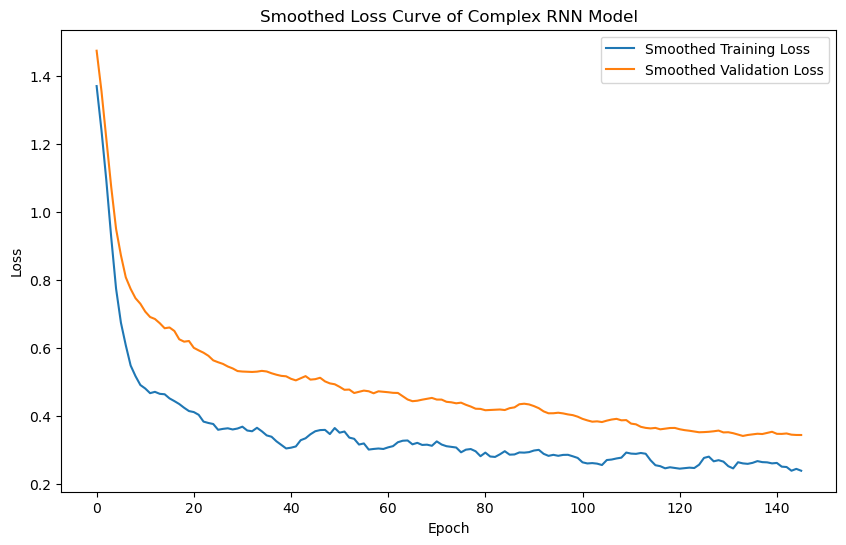

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, max_features=0.1, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, max_features=log2, min

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, max_features=0.1, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=log

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=400; total time=   2.0s
[CV] END max_depth=25, max_features=0.1, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=l

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   6.2s
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.0

[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  11.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   3.4s
[CV] END learning_rate=0.01,

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.3s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=5, max_features=0.1, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, max_features=0.1, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=400; total time=   2.1s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=log2, 

In [42]:
# Set random seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Ensure your input features and target variable are NumPy arrays
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# Reshape input to be [samples, time steps, features]
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 1: Define the more complex RNN model with customizable learning rate
def create_complex_rnn_model(learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.LSTM(128, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))  # LSTM layer
    model.add(layers.Dropout(0.35))  # Dropout layer for regularization
    model.add(layers.LSTM(64, return_sequences=True))  # Second LSTM layer
    model.add(layers.Dropout(0.35))  # Another Dropout layer
    model.add(layers.LSTM(32))  # Third LSTM layer
    model.add(layers.Dropout(0.35))  # Another Dropout layer
    model.add(layers.Dense(1))  # Output layer for regression
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])
    return model

# Step 2: Initialize the RNN model with a specified learning rate
learning_rate = 0.0015  # You can change this value as needed
complex_rnn_model = create_complex_rnn_model(learning_rate=learning_rate)

# Step 3: Train the model and save the history
history = complex_rnn_model.fit(X_train_rnn, y_train, epochs=150, batch_size=128, verbose=1, validation_split=0.2)

# Step 4: Make predictions
y_pred_rnn = complex_rnn_model.predict(X_test_rnn)

# Step 5: Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r_squared_rnn = r2_score(y_test, y_pred_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)

# Step 6: Print evaluation metrics
print(f"Recurrent Neural Network (RNN) Metrics:")
print(f"Mean Squared Error (MSE): {mse_rnn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rnn:.2f}")
print(f"R-squared: {r_squared_rnn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rnn:.2f}")

# Step 7: Smoothing the loss curves using moving averages
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Choose a window size for smoothing
window_size = 5

# Calculate smoothed loss values
smoothed_train_loss = moving_average(history.history['loss'], window_size)
smoothed_val_loss = moving_average(history.history['val_loss'], window_size)

# Step 8: Plotting the smoothed loss curve
plt.figure(figsize=(10, 6))
plt.plot(smoothed_train_loss, label='Smoothed Training Loss')
plt.plot(smoothed_val_loss, label='Smoothed Validation Loss')
plt.title('Smoothed Loss Curve of Complex RNN Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


_____